# Individual Assignment - Alexandre Collot - MBD 2021

### Sections

* [Question 1](#1)
* [Question 2](#2)
* [Question 3](#3)
* [Question 4](#4)
* [Question 5](#5)
* [Question 6](#6)

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

<a id='1'></a>
# Question 1 
### Load the data and rearrange it as a pandas DataFrame with the following structure:

* One column per stock and concept: Open, High, Low, Close, Adj close per stock
* Date as index (properly parsed)
* Rows sorted by date, ascending
* Be ready for dealing with errors in the names and some missing values.
* Paste here the `.dtypes` of the resulting DataFrame.

In [2]:
#Read the csv and indicate index and parse_dates columns

df = pd.read_csv('stocks_unclean.csv', parse_dates=['date'], index_col='date')

In [3]:
df.head()

,variable,value
date,,
2020-07-14,high_AAPL,9.725500e+01
2021-10-22,volume_AMZN,3.139100e+06
2021-06-04,volume_MSFT,2.528110e+07
2021-06-28,volume_AMZN,2.242800e+06
2021-11-23,low_GOOG,NaN


In [4]:
#Check the different variable name to verify the errors in naming

df['variable'].value_counts()

volume_AMZN    520
low_MSFT       520
volume_MSFT    519
volume_GOOG    519
open_GOOG      519
close_MSFT     518
open_AMZN      518
low_AMZN       518
high_AMZN      518
low_AAPL       517
close_AMZN     517
low_GOOG       517
open_AAPL      517
high_GOOG      517
high_MSFT      517
open_MSFT      516
close_GOOG     516
close_AAPL     513
high_AAPL      510
volume_AAPL    508
high_APL         8
close_GOG        6
open_MST         6
close_APL        6
volume_APL       5
close_AMZ        5
low_GOG          5
high_GOG         5
high_MST         5
open_AMZ         4
close_MST        4
high_AMZ         4
low_AMZ          4
volume_GOG       3
open_GOG         3
volume_MST       3
volume_AMZ       2
low_APL          2
open_APL         2
low_MST          2
Name: variable, dtype: int64

In [5]:
#Split the initial column 'variable' by creating a stock_name column and adjusting the initial variable column.
#Rename the column "variable" by "concept".

df['stock_name'] = df['variable'].str.split('_').str[1].replace(
    ['GOG','AMZ','MST','APL'],['GOOG','AMZN','MSFT','AAPL'])

df['concept'] = df['variable'].str.split('_').str[0]

In [6]:
#Check if errors in name have been arranged (yes!).

df['stock_name'].value_counts()

AMZN    2610
GOOG    2610
MSFT    2610
AAPL    2588
Name: stock_name, dtype: int64

In [7]:
#Check if errors in name have been arranged (yes!).

df['concept'].value_counts()

low       2085
close     2085
open      2085
high      2084
volume    2079
Name: concept, dtype: int64

In [8]:
#Rearrange the df to the requirements.

df = df.pivot_table(
    index=['date'], 
    columns=['stock_name','concept'],
    values='value').sort_values('date', ascending=True)

In [9]:
df.head()

stock_name       AAPL                                                \
concept         close       high        low       open       volume   
date                                                                  
2019-12-31  73.412498  73.419998  72.379997  72.482498  100805600.0   
2020-01-02  75.087502  75.150002  73.797501  74.059998  135480400.0   
2020-01-03  74.357498  75.144997  74.125000  74.287498  146322800.0   
2020-01-06  74.949997  74.989998  73.187500  73.447502  118387200.0   
2020-01-07  74.597504  75.224998  74.370003  74.959999  108872000.0   

stock_name         AMZN                                               \
concept           close         high          low    open     volume   
date                                                                   
2019-12-31  1847.839966  1853.260010  1832.229980  1842.0  2506500.0   
2020-01-02  1898.010010  1898.010010  1864.150024  1875.0  4029000.0   
2020-01-03  1874.969971  1886.199951  1864.500000  1864.5  3764400.0   
2020-01-06  1902.880005  1903.689941  1860.000000  1860.0  4061800.0   
2020-01-07  1906.859985  1913.890015  1892.040039  1904.5  4044900.0   

stock_name         GOOG                                                    \
concept           close         high          low         open     volume   
date                                                                        
2019-12-31  1337.020020  1338.000000  1329.084961  1330.109985   961800.0   
2020-01-02  1367.369995  1368.140015  1341.550049  1341.550049  1406600.0   
2020-01-03  1360.660034  1372.500000  1345.543945  1347.859985  1186400.0   
2020-01-06  1394.209961  1396.500000          NaN  1350.000000  1732300.0   
2020-01-07  1393.339966  1402.989990  1390.380005  1397.939941  1502700.0   

stock_name        MSFT                                                  
concept          close        high         low        open      volume  
date                                                                    
2019-12-31  157.699997  157.770004  156.449997  156.770004  18369400.0  
2020-01-02  160.619995  160.729996  158.330002  158.779999  22622100.0  
2020-01-03  158.619995  159.949997         NaN  158.320007  21116200.0  
2020-01-06  159.029999  159.100006  156.509995  157.080002  20813700.0  
2020-01-07  157.580002  159.669998  157.320007  159.320007  21634100.0

In [10]:
#Look at the number of null values for each concept of each stock_name
#Helps to understand in chich columns are the null values.

df.isnull().sum()

stock_name  concept
AAPL        close       7
            high        8
            low         8
            open        8
            volume     13
AMZN        close       4
            high        6
            low         4
            open        3
            volume      2
GOOG        close       7
            high        2
            low         2
            open        2
            volume      7
MSFT        close       2
            high        2
            low         3
            open        4
            volume      6
dtype: int64

In [11]:
#Get unique stocks in a list.
stocks = list(df.columns.levels[0])

#Replace null values depending on the concept (close, open, high, low, volume).
#I did not decide to use ffill or bfill to replace null values.
#I wanted to keep consistency with the actual values (i.e no null values can be higher than max).

for stock in stocks:
    #close: compute the average of high and low
    df[stock,'close'].fillna(
    value=(df[stock,'high']+df[stock,'low'])/2, inplace=True)
    
    #open: compute the average of high and low
    df[stock,'open'].fillna(
    value=(df[stock,'high']+df[stock,'low'])/2, inplace=True)
    
    #high: compute the maximum in the row between open and close
    df[stock,'high'].fillna(
    value=df[stock].drop(axis=1, columns=['volume','low']).max(axis=1), inplace=True)
    
    #low: compute the minimum in the row between open and close
    df[stock,'low'].fillna(
    value=df[stock].drop(axis=1, columns=['volume','high']).min(axis=1), inplace=True)
    
    #use interpolate for null values in column volume
    df[stock,'volume'].interpolate(method='linear', inplace=True)

In [12]:
#In my opinion it makes no sense to keep the volume columns as float
#The volume is expressed by entire value
#Replace the volume columns of each stock to the integer type

for stock in stocks:
    df[stock,'volume'] = df[stock,'volume'].astype(int)

In [13]:
df.head()

stock_name       AAPL                                              \
concept         close       high        low       open     volume   
date                                                                
2019-12-31  73.412498  73.419998  72.379997  72.482498  100805600   
2020-01-02  75.087502  75.150002  73.797501  74.059998  135480400   
2020-01-03  74.357498  75.144997  74.125000  74.287498  146322800   
2020-01-06  74.949997  74.989998  73.187500  73.447502  118387200   
2020-01-07  74.597504  75.224998  74.370003  74.959999  108872000   

stock_name         AMZN                                             \
concept           close         high          low    open   volume   
date                                                                 
2019-12-31  1847.839966  1853.260010  1832.229980  1842.0  2506500   
2020-01-02  1898.010010  1898.010010  1864.150024  1875.0  4029000   
2020-01-03  1874.969971  1886.199951  1864.500000  1864.5  3764400   
2020-01-06  1902.880005  1903.689941  1860.000000  1860.0  4061800   
2020-01-07  1906.859985  1913.890015  1892.040039  1904.5  4044900   

stock_name         GOOG                                                  \
concept           close         high          low         open   volume   
date                                                                      
2019-12-31  1337.020020  1338.000000  1329.084961  1330.109985   961800   
2020-01-02  1367.369995  1368.140015  1341.550049  1341.550049  1406600   
2020-01-03  1360.660034  1372.500000  1345.543945  1347.859985  1186400   
2020-01-06  1394.209961  1396.500000  1350.000000  1350.000000  1732300   
2020-01-07  1393.339966  1402.989990  1390.380005  1397.939941  1502700   

stock_name        MSFT                                                
concept          close        high         low        open    volume  
date                                                                  
2019-12-31  157.699997  157.770004  156.449997  156.770004  18369400  
2020-01-02  160.619995  160.729996  158.330002  158.779999  22622100  
2020-01-03  158.619995  159.949997  158.320007  158.320007  21116200  
2020-01-06  159.029999  159.100006  156.509995  157.080002  20813700  
2020-01-07  157.580002  159.669998  157.320007  159.320007  21634100

In [14]:
#Check if we dealt with all null values (yes!).

df.isnull().sum()

stock_name  concept
AAPL        close      0
            high       0
            low        0
            open       0
            volume     0
AMZN        close      0
            high       0
            low        0
            open       0
            volume     0
GOOG        close      0
            high       0
            low        0
            open       0
            volume     0
MSFT        close      0
            high       0
            low        0
            open       0
            volume     0
dtype: int64

In [15]:
#Use describe to look at descriptive statistic of columns after having replaced the null values.
#We can see that the replacing worked.

df.describe()

stock_name        AAPL                                                    \
concept          close        high         low        open        volume   
count       522.000000  522.000000  522.000000  522.000000  5.220000e+02   
mean        119.656089  121.016164  118.175388  119.572431  1.234215e+08   
std          30.426348   30.635294   30.265359   30.493232  6.243689e+07   
min          56.092499   57.125000   53.152500   57.020000  4.100000e+07   
25%          93.192501   94.576252   92.615000   93.719999  8.151080e+07   
50%         124.725002  125.830002  122.825001  124.450001  1.073365e+08   
75%         142.914997  144.360004  141.629997  143.189999  1.460835e+08   
max         182.009995  182.940002  179.119995  182.630005  4.265100e+08   

stock_name         AMZN                                                       \
concept           close         high          low         open        volume   
count        522.000000   522.000000   522.000000   522.000000  5.220000e+02   
mean        3014.297047  3050.217275  2978.757184  3015.953931  4.147288e+06   
std          516.929627   521.579483   515.521973   520.416124  1.794726e+06   
min         1676.609985  1721.979980  1626.030029  1641.510010  1.451900e+06   
25%         2906.147400  2973.750000  2871.025024  2916.507507  2.913600e+06   
50%         3199.574951  3233.584961  3163.839966  3203.435059  3.660150e+06   
75%         3349.644897  3384.497498  3312.779968  3351.000000  4.965425e+06   
max         3731.409912  3773.080078  3696.790039  3744.000000  1.556730e+07   

stock_name         GOOG                                                       \
concept           close         high          low         open        volume   
count        522.000000   522.000000   522.000000   522.000000  5.220000e+02   
mean        2016.657092  2036.596215  1995.163953  2014.852245  1.574292e+06   
std          595.419074   597.628345   593.863059   596.357834  7.129081e+05   
min         1056.619995  1071.319946  1013.536011  1056.510010  3.468000e+05   
25%         1481.032501  1490.814972  1465.129974  1475.827454  1.096350e+06   
50%         1819.015015  1832.765015  1792.838989  1811.054993  1.400900e+06   
75%         2624.505066  2649.839905  2612.012512  2630.392578  1.812038e+06   
max         3014.179932  3037.000000  2997.750000  3020.000000  4.329100e+06   

stock_name        MSFT                                                    
concept          close        high         low        open        volume  
count       522.000000  522.000000  522.000000  522.000000  5.220000e+02  
mean        236.569147  238.930728  233.963429  236.453410  3.216741e+07  
std          52.583406   52.571402   52.535186   52.663467  1.464050e+07  
min         135.419998  140.570007  132.520004  137.009995  1.055060e+07  
25%         202.487499  204.347500  199.582504  201.722504  2.273820e+07  
50%         224.965004  227.784996  222.720001  225.369995  2.809975e+07  
75%         281.790009  283.990005  279.737488  282.107498  3.644320e+07  
max         343.109985  349.670013  342.200012  344.619995  9.701270e+07

In [16]:
#Obtain the type of each columns.

df.dtypes

stock_name  concept
AAPL        close      float64
            high       float64
            low        float64
            open       float64
            volume       int64
AMZN        close      float64
            high       float64
            low        float64
            open       float64
            volume       int64
GOOG        close      float64
            high       float64
            low        float64
            open       float64
            volume       int64
MSFT        close      float64
            high       float64
            low        float64
            open       float64
            volume       int64
dtype: object

<a id='2'></a>
# Question 2
### Visualize the data as follows:

* Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points).
* Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points)
* Add meaningful visualizations of your choice (0.5 points)


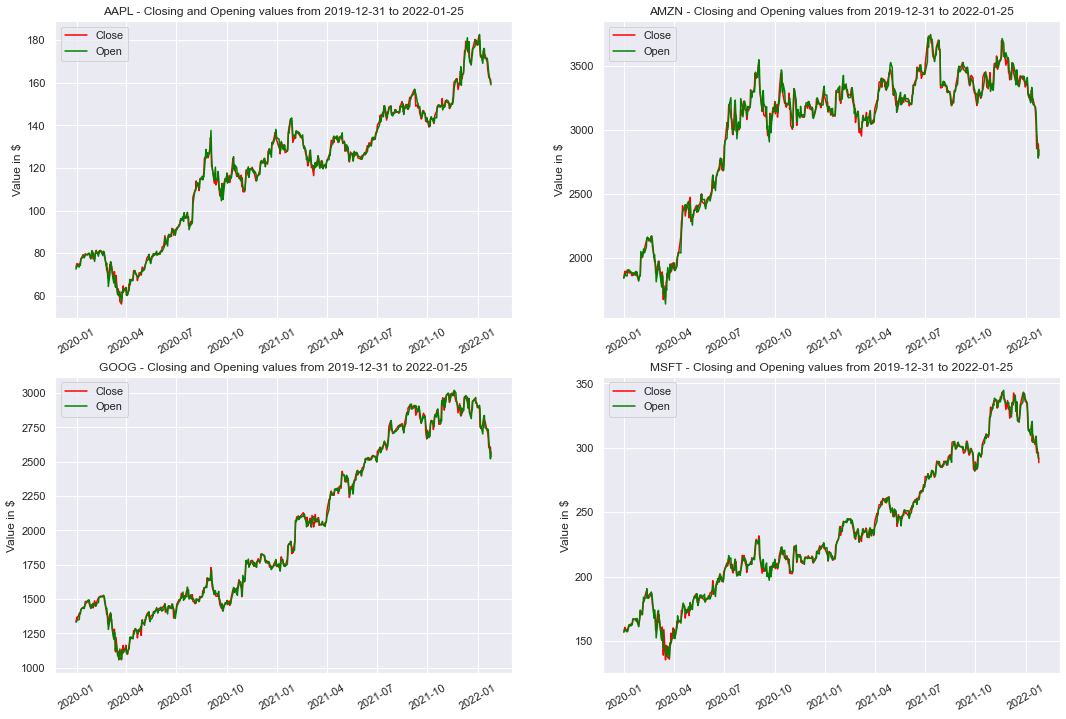

In [17]:
#Create a 2x2 grid of plots in which you plot the "Open" in green and "Close" in red for each stock (0.5 points).
#Open and close plots for each stock
#I decided to use a for loop to plot the graphs: it is easier, shorter and can modify more easily in future (in case new stock for instance)

plt.figure(figsize=(18,12))

for i, stock in zip(range(1,5),stocks):
    min_date_stock = str(df[stock].index.min().date())
    max_date_stock = str(df[stock].index.max().date())
    plt.subplot(2, 2, i)
    plt.plot(df[stock,'close'], label='Close', color='red')
    plt.plot(df[stock,'open'], label='Open', color='green')
    plt.title(f'{stock} - Closing and Opening values from {min_date_stock} to {max_date_stock}')
    plt.xticks(rotation=30)
    plt.ylabel('Value in $')
    plt.legend()
    
plt.show()

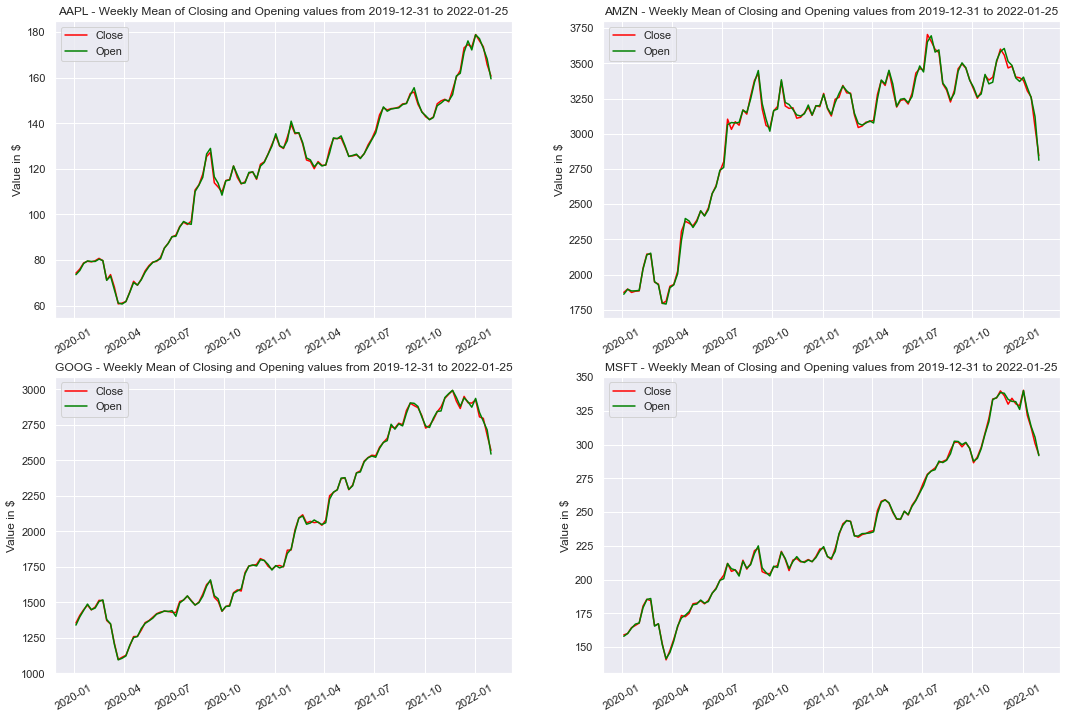

In [18]:
#Repeat the 2x2 grid but resampling with the weekly average of "Open" and "Close" (0.5 points).
#Resample by week mean of open and close plots for each stock.

plt.figure(figsize=(18,12))

for i, stock in zip(range(1,5),stocks):
    min_date_stock = str(df[stock].index.min().date())
    max_date_stock = str(df[stock].index.max().date())
    plt.subplot(2, 2, i)
    plt.plot(df[stock,'close'].resample('W').mean(), label='Close', color='red')
    plt.plot(df[stock,'open'].resample('W').mean(), label='Open', color='green')
    plt.title(f'{stock} - Weekly Mean of Closing and Opening values from {min_date_stock} to {max_date_stock}')
    plt.xticks(rotation=30)
    plt.ylabel('Value in $')
    plt.legend()
    
plt.show()

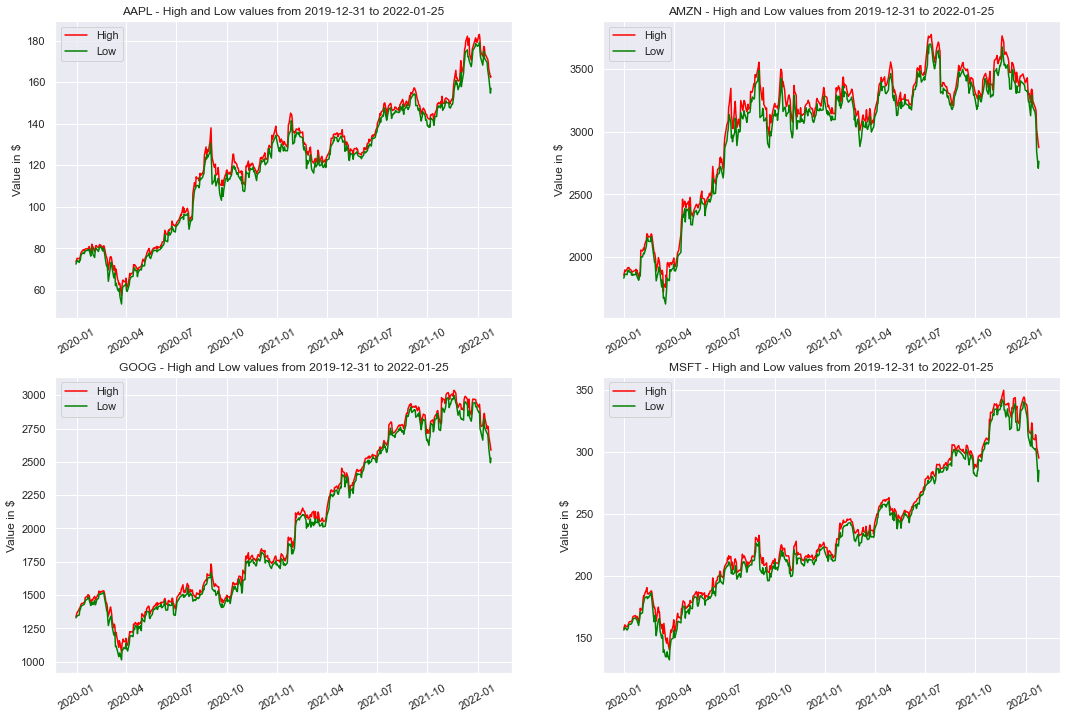

In [19]:
#Add meaningful visualizations of your choice (0.5 points).
#Low and high plot for each stock.

plt.figure(figsize=(18,12))

for i, stock in zip(range(1,5),stocks):
    min_date_stock = str(df[stock].index.min().date())
    max_date_stock = str(df[stock].index.max().date())
    plt.subplot(2, 2, i)
    plt.plot(df[stock,'high'], label='High', color='red')
    plt.plot(df[stock,'low'], label='Low', color='green')
    plt.title(f'{stock} - High and Low values from {min_date_stock} to {max_date_stock}')
    plt.xticks(rotation=30)
    plt.ylabel('Value in $')
    plt.legend()
    
plt.show()

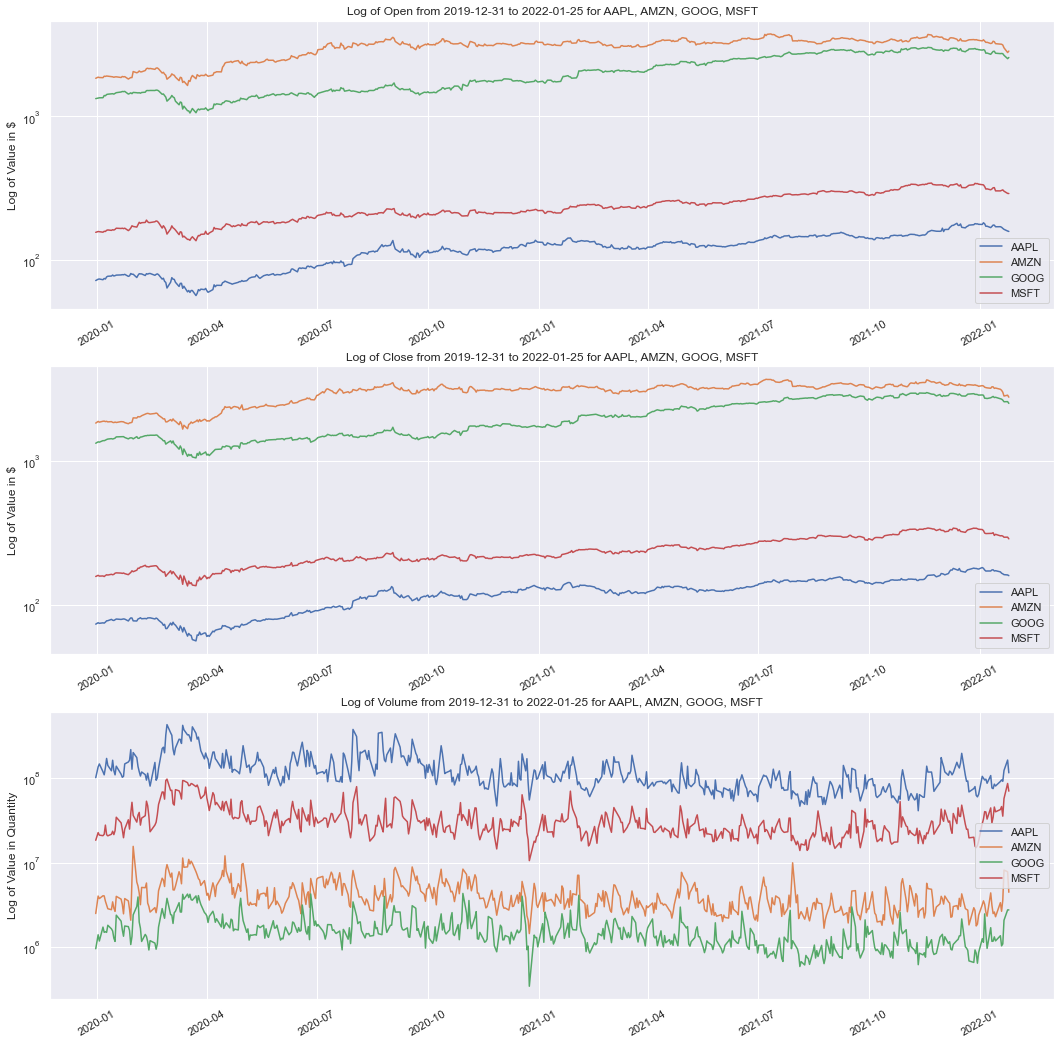

In [20]:
#Add meaningful visualizations of your choice (0.5 points).
#I decided to only focus on library seen in class and not to add additional libraries for visualizations.
#Log of open, log of close and log of volume for the 4 stocks.
#It gives a vision that allows us to compare the different stock evolutions over time on same scale

plt.figure(figsize=(18,18))
metrics_plot = ['open','close','volume']
min_date_df = str(df.index.min().date())
max_date_df = str(df.index.max().date())
stocks_analysed = str(stocks)[1:-1].replace("'","")

for i, metric in zip(range(1,4),metrics_plot):
    plt.subplot(3, 1, i)
    for stock in stocks:
        plt.plot(df[stock,metric], label=stock)
    plt.title(f'Log of {metric.title()} from {min_date_df} to {max_date_df} for {stocks_analysed}')
    plt.yscale('log')
    plt.xticks(rotation=30)
    plt.legend()
    if metric == 'volume':
        plt.ylabel('Log of Value in Quantity')
    else:
        plt.ylabel('Log of Value in $')

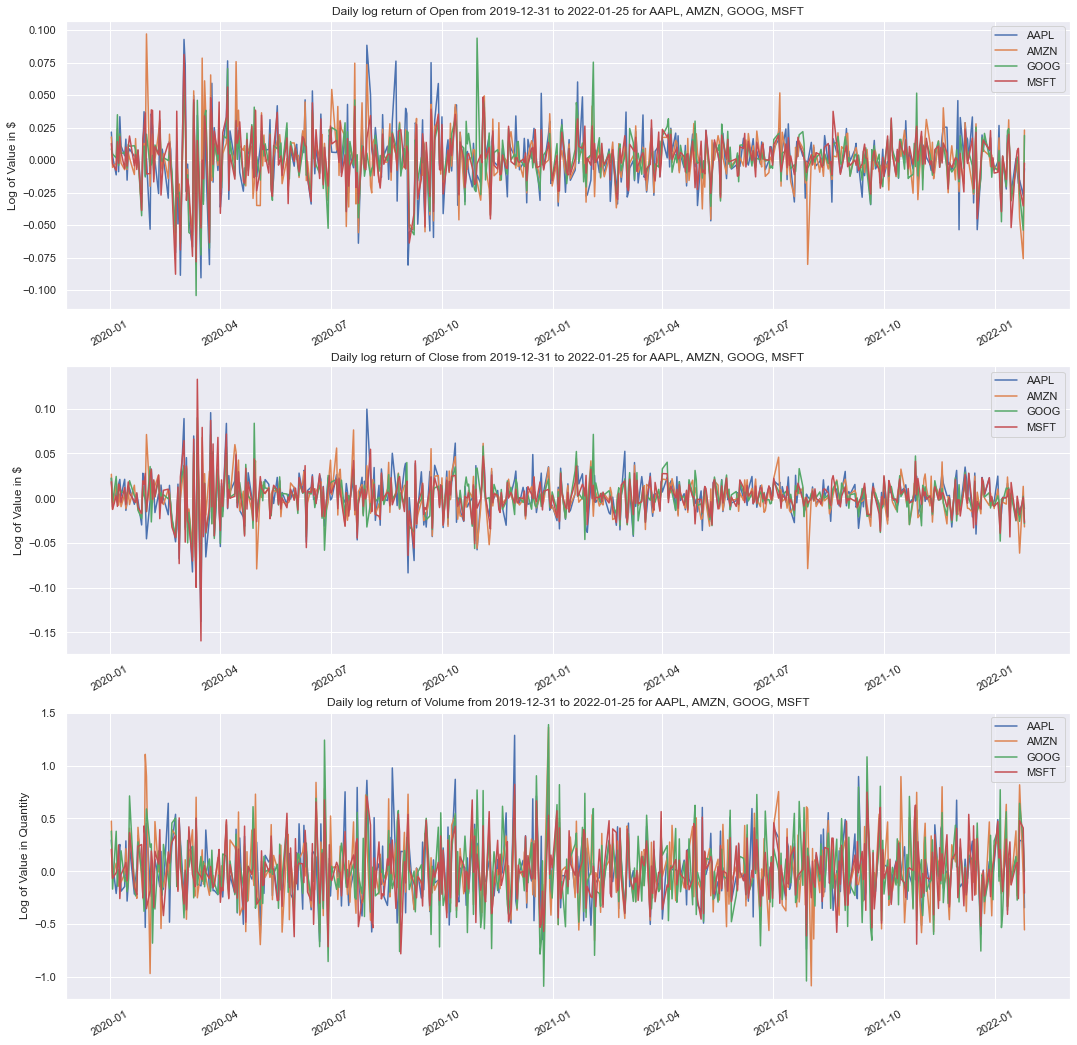

In [21]:
#Add meaningful visualizations of your choice (0.5 points).
#Log return of open, log return of close and log return of volume for the 4 values
#It gives a vision that allows us to compare the different stock evolutions vs the previous day over time on same scale

plt.figure(figsize=(18,18))
metrics_plot = ['open','close','volume']
min_date_df = str(df.index.min().date())
max_date_df = str(df.index.max().date())
stocks_analysed = str(stocks)[1:-1].replace("'","")

for i, metric in zip(range(1,4),metrics_plot):
    plt.subplot(3, 1, i)
    for stock in stocks:
        daily_log_return = np.log(df[stock,metric]/df[stock,metric].shift(1))
        plt.plot(daily_log_return, label=stock)
    plt.title(f'Daily log return of {metric.title()} from {min_date_df} to {max_date_df} for {stocks_analysed}')
    plt.xticks(rotation=30)
    plt.legend()
    if metric == 'volume':
        plt.ylabel('Log of Value in Quantity')
    else:
        plt.ylabel('Log of Value in $')


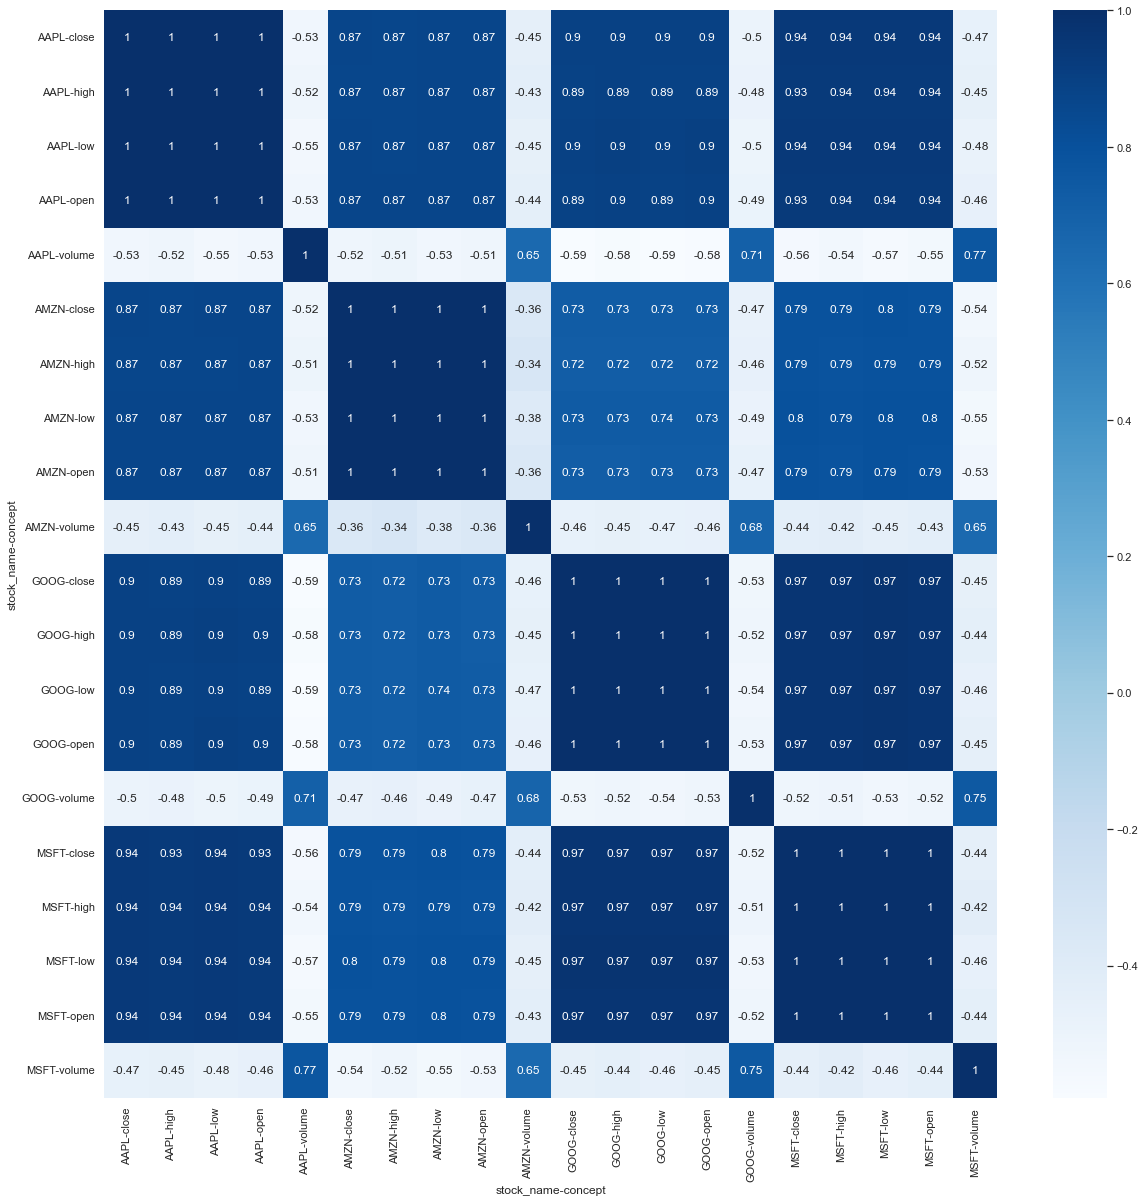

In [22]:
#Add meaningful visualizations of your choice (0.5 points).
#The following heatmap indicates us the correlations between the different stocks and concepts
#It is interesting to look how different stocks are correlated

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.show()

<a id='3'></a>
# Question 3
### Create a function that calculates the Return of Investment (ROI). Let's suppose you buy one stock one day, you hold it for N days (lookback period) and after N days you sell it. The ROI formula is:

$ROI = \frac{FVI-IVI}{IVI}* 100$

* IVI: initial value of investment. This is the price at which you bought the stock
* FVI: final value of investment. This is the price at which you sold the stock
* ROI: Return of Investment. This is the percentage of increase in value of the investment

#### Now that we know how to calculate the ROI, create a function in Python that receives as parameters the following:
* lookback: the number of days you hold the stock
* name: the name of the stock, using the "Close" value of the stock
* data: the dataframe with the stock data
* Paste here the result of `roi(365, "GOOG", df)`.


In [23]:
#in order to create the function and apply the lookback we have to be sure we have the rows for every day
#to do so, as we don't have data for weekend, I resample the df daily and fill out the null with ffill

df = df.resample("D").fillna(method='ffill')
df.head()

stock_name       AAPL                                              \
concept         close       high        low       open     volume   
date                                                                
2019-12-31  73.412498  73.419998  72.379997  72.482498  100805600   
2020-01-01  73.412498  73.419998  72.379997  72.482498  100805600   
2020-01-02  75.087502  75.150002  73.797501  74.059998  135480400   
2020-01-03  74.357498  75.144997  74.125000  74.287498  146322800   
2020-01-04  74.357498  75.144997  74.125000  74.287498  146322800   

stock_name         AMZN                                             \
concept           close         high          low    open   volume   
date                                                                 
2019-12-31  1847.839966  1853.260010  1832.229980  1842.0  2506500   
2020-01-01  1847.839966  1853.260010  1832.229980  1842.0  2506500   
2020-01-02  1898.010010  1898.010010  1864.150024  1875.0  4029000   
2020-01-03  1874.969971  1886.199951  1864.500000  1864.5  3764400   
2020-01-04  1874.969971  1886.199951  1864.500000  1864.5  3764400   

stock_name         GOOG                                                  \
concept           close         high          low         open   volume   
date                                                                      
2019-12-31  1337.020020  1338.000000  1329.084961  1330.109985   961800   
2020-01-01  1337.020020  1338.000000  1329.084961  1330.109985   961800   
2020-01-02  1367.369995  1368.140015  1341.550049  1341.550049  1406600   
2020-01-03  1360.660034  1372.500000  1345.543945  1347.859985  1186400   
2020-01-04  1360.660034  1372.500000  1345.543945  1347.859985  1186400   

stock_name        MSFT                                                
concept          close        high         low        open    volume  
date                                                                  
2019-12-31  157.699997  157.770004  156.449997  156.770004  18369400  
2020-01-01  157.699997  157.770004  156.449997  156.770004  18369400  
2020-01-02  160.619995  160.729996  158.330002  158.779999  22622100  
2020-01-03  158.619995  159.949997  158.320007  158.320007  21116200  
2020-01-04  158.619995  159.949997  158.320007  158.320007  21116200

In [24]:
#Create the function that takes into account the parameters required.

def roi(lookback,name,data):
    roi = (data[name,'close']/data[name,'close'].shift(lookback) -1) * 100
    return round(roi,2)

In [25]:
#Apply the function for our df, for the stock 'GOOG' with a lookback of 365 days.

roi(365, "GOOG", df)

date
2019-12-31      NaN
2020-01-01      NaN
2020-01-02      NaN
2020-01-03      NaN
2020-01-04      NaN
              ...  
2022-01-21    37.57
2022-01-22    36.86
2022-01-23    36.86
2022-01-24    37.16
2022-01-25    33.45
Freq: D, Name: (GOOG, close), Length: 757, dtype: float64

<a id='4'></a>
# Question 4

### Apply the ROI function to the portfolio. Create as many ROI columns as different stocks you have in the portfolio and plot them, representing for each stock:

* ROI after holding the stock for 365 days (red, dashed line) (0.5 points)
* ROI after holding the stock for 180 days (blue, dotted line) (0.5 points)
* ROI after holding the stock for 90 days (green, solid line) (0.5 points)

In [26]:
#We still have our list of distinct stocks.

stocks

['AAPL', 'AMZN', 'GOOG', 'MSFT']

In [27]:
#Put the different lookbacks in a list to loop.

lookbacks = ['365','180','90']
lookbacks

['365', '180', '90']

In [28]:
#Looping to create the new columns of ROI_365, ROI_180 & ROI_90 for the different stock.

for stock in stocks:
    for lookback in lookbacks:
        df[(stock,str('ROI_'+str(lookback)))] = roi(int(lookback),stock,df)
        
#Use stack and unstack methods to update the dataframe to the new columns in the multindex header and avoid duplicate columns

df = df.stack().unstack()

In [29]:
#Change type of volume column to integer

for stock in stocks:
    df[stock,'volume'] = df[stock,'volume'].astype(int)

In [30]:
#We can see the new columns

df.head()

stock_name    AAPL                                                             \
concept    ROI_180 ROI_365 ROI_90      close       high        low       open   
date                                                                            
2019-12-31     NaN     NaN    NaN  73.412498  73.419998  72.379997  72.482498   
2020-01-01     NaN     NaN    NaN  73.412498  73.419998  72.379997  72.482498   
2020-01-02     NaN     NaN    NaN  75.087502  75.150002  73.797501  74.059998   
2020-01-03     NaN     NaN    NaN  74.357498  75.144997  74.125000  74.287498   
2020-01-04     NaN     NaN    NaN  74.357498  75.144997  74.125000  74.287498   

stock_name               AMZN          ...         GOOG             MSFT  \
concept        volume ROI_180 ROI_365  ...         open   volume ROI_180   
date                                   ...                                 
2019-12-31  100805600     NaN     NaN  ...  1330.109985   961800     NaN   
2020-01-01  100805600     NaN     NaN  ...  1330.109985   961800     NaN   
2020-01-02  135480400     NaN     NaN  ...  1341.550049  1406600     NaN   
2020-01-03  146322800     NaN     NaN  ...  1347.859985  1186400     NaN   
2020-01-04  146322800     NaN     NaN  ...  1347.859985  1186400     NaN   

stock_name                                                                 \
concept    ROI_365 ROI_90       close        high         low        open   
date                                                                        
2019-12-31     NaN    NaN  157.699997  157.770004  156.449997  156.770004   
2020-01-01     NaN    NaN  157.699997  157.770004  156.449997  156.770004   
2020-01-02     NaN    NaN  160.619995  160.729996  158.330002  158.779999   
2020-01-03     NaN    NaN  158.619995  159.949997  158.320007  158.320007   
2020-01-04     NaN    NaN  158.619995  159.949997  158.320007  158.320007   

stock_name            
concept       volume  
date                  
2019-12-31  18369400  
2020-01-01  18369400  
2020-01-02  22622100  
2020-01-03  21116200  
2020-01-04  21116200  

[5 rows x 32 columns]

In [31]:
#We can see the new columns

df.dtypes

stock_name  concept
AAPL        ROI_180    float64
            ROI_365    float64
            ROI_90     float64
            close      float64
            high       float64
            low        float64
            open       float64
            volume       int64
AMZN        ROI_180    float64
            ROI_365    float64
            ROI_90     float64
            close      float64
            high       float64
            low        float64
            open       float64
            volume       int64
GOOG        ROI_180    float64
            ROI_365    float64
            ROI_90     float64
            close      float64
            high       float64
            low        float64
            open       float64
            volume       int64
MSFT        ROI_180    float64
            ROI_365    float64
            ROI_90     float64
            close      float64
            high       float64
            low        float64
            open       float64
            volume 

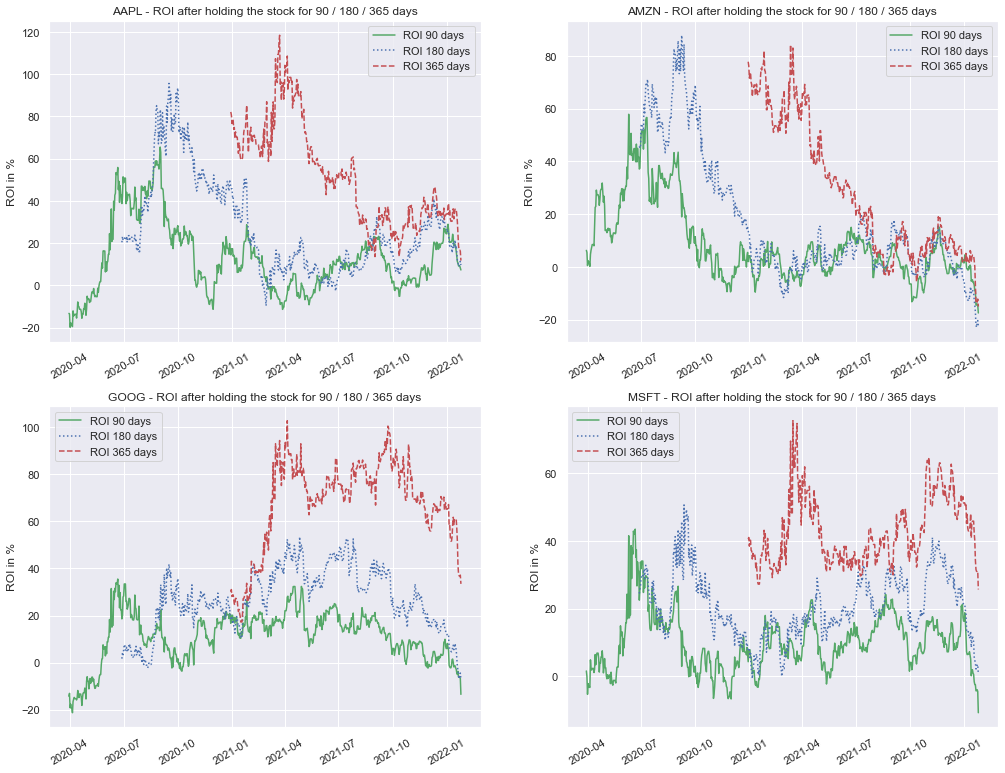

In [32]:
#Plot the different ROI lookback for each stock.

plt.figure(figsize=(17,13))

for i, stock in zip(range(1,5),stocks):
    plt.subplot(2, 2, i)
    plt.plot(df[stock,'ROI_90'], label='ROI 90 days', color='g')
    plt.plot(df[stock,'ROI_180'],label='ROI 180 days', color='b', linestyle=':')
    plt.plot(df[stock,'ROI_365'], label='ROI 365 days', color='r', linestyle='--')
    plt.title(f'{stock} - ROI after holding the stock for 90 / 180 / 365 days')
    plt.xticks(rotation=30)
    plt.ylabel('ROI in %')
    plt.legend()
    
plt.show()

<a id='5'></a>
## Question 5

The average ROI is a single number that comes from computing the overall mean of the ROI over the whole period of the series. Given these two portfolios, which one has the best average ROI, with a lookback of 365 days? (Keep in mind that ROI is a percentage and you can't average it directly - you need to convert the ROI to a return in currency by multiplying it by the buy price, and then average that over the period)

Portfolio 1:
* AAPL 40%
* GOOG 30%
* MSFT 20%
* AMZN 10%

Portfolio 2:
* AAPL 30%
* GOOG 20%
* MSFT 10%
* AMZN 40%

In [33]:
#Create a function that evaluates a portfolio with weight of each stock to return the average ROI in $

def avg_roi_portfolio(lookback,portfolio,data):
    avg_roi_stocks_portfolio = []
    for stock, weight in zip(list(portfolio.keys()),list(portfolio.values())):
        #Obtain the mean ROI in $ of a single stock depending on the lookback and using the ROI function
        avg_roi_stock = (roi(lookback,stock,data)/100 * df[stock,'close'].shift(lookback)).mean()
        #To get accurate portfolio overall average ROI we need to multiply each stock by its weight in portfolio
        avg_roi_stocks_portfolio.append(avg_roi_stock * weight)
    return round((sum(avg_roi_stocks_portfolio)/sum(portfolio.values())),2)

In [34]:
#To answer question I create a dictionary of weight for each stocks in both portfolios

portfolio_1 = {'AAPL':40,'AMZN':10,'GOOG':30,'MSFT':20}
portfolio_2 = {'AAPL':30,'AMZN':40,'GOOG':20,'MSFT':10}

In [35]:
#Evaluate both profolios with the function to get the average ROI in $

avg_roi_portfolio_1 = avg_roi_portfolio(365,portfolio_1,df)
avg_roi_portfolio_2 = avg_roi_portfolio(365,portfolio_2,df)

print(f'The average ROI for portfolio 1 with a 365 days lookback is {avg_roi_portfolio_1}$')
print(f'The average ROI for portfolio 2 with a 365 days lookback is {avg_roi_portfolio_2}$')

The average ROI for portfolio 1 with a 365 days lookback is 402.47$
The average ROI for portfolio 2 with a 365 days lookback is 476.89$


<a id='6'></a>
## Question 6

Find a better combination in your portfolio. The new combination should beat the best portfolio that you found in the previous exercise.

In [36]:
#Create a function that will generate random portfolio repartition 
#Use RNG to obtain the same results when we run again the notebook

def generate_random_portfolios(num_portfolios):
    results = np.zeros((3,num_portfolios))
    portfolio_weights = []
    rng = np.random.default_rng(42)
    for i in range(num_portfolios):
        weights = rng.random(4)
        weights /= np.sum(weights)
        weights = weights*100
        portfolio_weights.append(dict(zip(stocks, np.round(weights,2))))
    return portfolio_weights

In [37]:
#Create a temporary list of 2000 random portfolio percentage for our 4 stocks

temp_list_random_portfolios = generate_random_portfolios(2000)

In [38]:
#We have our 2000 portfolios

len(temp_list_random_portfolios)

2000

In [39]:
#I decide to include the random portfolios which ALL weight are greater than 4%
#I append the random portfolio in a new list
#This will allow us to avoid habing portfolios with some very low weights (ie. 0.01) even if they improve the portfolio.

list_random_portfolios=[]
for random_portfolio in temp_list_random_portfolios:
    weights = list(random_portfolio.values()) 
    if (all(weight >= 4 for weight in weights)):
        list_random_portfolios.append(random_portfolio)
        

In [40]:
#We keep 1519 portfolios that have all weights between the 4 stocks grater than 4%

len(list_random_portfolios)

1519

In [41]:
#For each random portfolio we obtain the average ROI depending on the percentage of each stock
list_roi_portfolio = []
for portfolio in list_random_portfolios:
    list_roi_portfolio.append(round(avg_roi_portfolio(365,portfolio,df),2))

#Obtain the maximum average ROI withing the different 1519 random protfolios
max_value = max(list_roi_portfolio)

#Obtain the index of the maximum average ROI to know the portfolio weight between the 4 stocks
max_index = list_roi_portfolio.index(max_value)

#Assign the ROI optimized portfolio repartion and its average ROI to variables
optimized_portfolio = list_random_portfolios[max_index]
avg_roi_optimized_portfolio = list_roi_portfolio[max_index]

print(f'The following portfolio, {optimized_portfolio} has an average ROI of {avg_roi_optimized_portfolio}$.')

The following portfolio, {'AAPL': 9.57, 'AMZN': 5.68, 'GOOG': 78.85, 'MSFT': 5.9} has an average ROI of 845.94$.


In [42]:
#Check if this optimized portfolio beat the best portfolio between portfolio 1 & 2. (Yes! :))
max_question5 = max(avg_roi_portfolio_1,avg_roi_portfolio_2)

if avg_roi_optimized_portfolio > max_question5:
    print(f'Our portfolio beat the best portfolio of question 4, with an improvement of +{round(avg_roi_optimized_portfolio-max_question5,2)}$')
else:
    print('Our portfolio did not beat the best portfolio')

Our portfolio beat the best portfolio of question 4, with an improvement of +369.05$


In [43]:
#This is our best average roi for the optimized portfolio in term of average ROI in $ and a lookback of 365 days
#Check applying function directly 

avg_roi_portfolio(365,optimized_portfolio,df)

845.94

In [44]:
#We can sum up the weight of each stock in a dataframe.

df_optimized_roi = pd.Series(optimized_portfolio,name="%").to_frame()
df_optimized_roi

,%
AAPL,9.57
AMZN,5.68
GOOG,78.85
MSFT,5.90


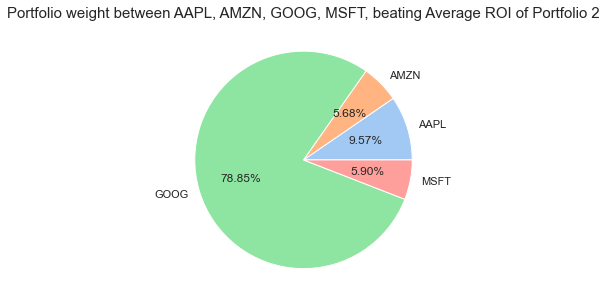

In [45]:
#And we can even create a pie chart summarizing the splitting between the different stocks

plt.figure(figsize=(5,5))
colors = sns.color_palette('pastel')[0:5]
plt.pie(df_optimized_roi['%'], labels=df_optimized_roi.index, colors=colors, autopct='%.2f%%')
plt.title(f'Portfolio weight between {stocks_analysed}, beating Average ROI of Portfolio 2',fontsize=15)
plt.show()

In [46]:
#I want to go beyond and propose the 10 top portfolios optimizing the average ROI in $
#All of them have all stock with weight of minimum 4%

In [47]:
#Find the top 10 average ROI and their index

top10_value = sorted(list_roi_portfolio)[-10:]

top10_index = []
for value in top10_value:
    top10_index.append(list_roi_portfolio.index(value))
    
top10_portfolios = []
for index in top10_index:
    top10_portfolios.append(list_random_portfolios[index])

In [48]:
#Create a dataframe of the top 10 portfolios optimizing the average ROI in a period of 365 days

df_top10_optimized_roi = pd.DataFrame(top10_portfolios).sort_index(ascending=False)
df_top10_optimized_roi.index = ['#1','#2','#3','#4','#5','#6','#7','#8','#9','#10']
df_top10_optimized_roi['Avg_ROI_365'] = sorted(top10_value, reverse=True)
df_top10_optimized_roi

,AAPL,AMZN,GOOG,MSFT,Avg_ROI_365
#1,9.57,5.68,78.85,5.90,845.94
#2,4.66,32.64,57.86,4.84,799.34
#3,5.59,11.49,69.16,13.77,788.75
#4,10.06,5.12,71.48,13.34,773.96
#5,10.46,16.72,64.63,8.19,773.31
#6,12.34,18.65,62.86,6.15,766.63
#7,9.96,30.31,55.51,4.22,762.69
#8,11.29,18.04,62.73,7.93,762.55
#9,9.52,4.67,69.45,16.36,752.78
#10,19.75,11.26,64.84,4.14,741.99


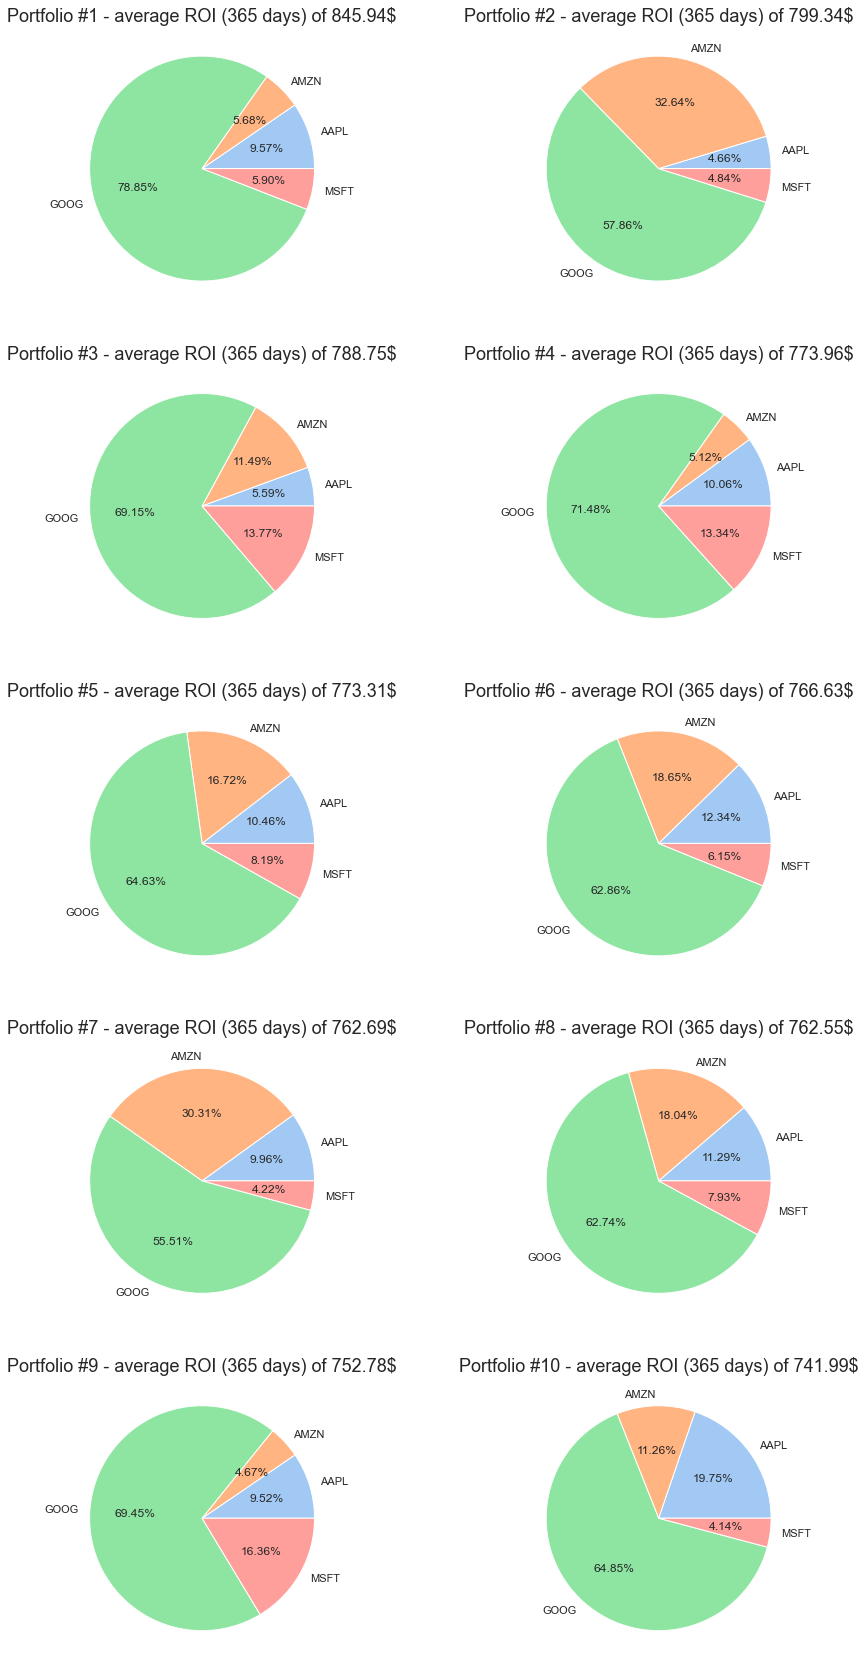

In [49]:
#Represent graphically the top 10 portfolios

plt.figure(figsize=(15,30))

for i, top, average in zip(range(1,11),list(df_top10_optimized_roi.index),sorted(top10_value, reverse=True)):
    colors = sns.color_palette('pastel')[0:5]
    plt.subplot(5, 2, i)
    plt.pie(df_top10_optimized_roi.loc[top,['AAPL','AMZN','GOOG','MSFT']], labels=['AAPL','AMZN','GOOG','MSFT'], colors=colors, autopct='%.2f%%')
    plt.title(f'Portfolio {top} - average ROI (365 days) of {average}$', fontsize=18)
plt.show()